In [8]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import new_interf

from datetime import datetime, timedelta



In [9]:
moon_data = pd.read_csv('hour_data.csv')

moon_volts = moon_data['all_voltages']
moon_times = moon_data['all_times']
#print(datetime.utcfromtimestamp(moon_times[0]).strftime('%Y-%m-%d %H:%M:%S'), "in UTC")
def utc_to_local(unix_time):
    utc_dt = datetime.utcfromtimestamp(unix_time)
    time = utc_dt - timedelta(hours=8)
    return time.strftime('%Y-%m-%d %H:%M:%S')
t= utc_to_local(moon_times[0])
print(t, "local time")

#print(moon_times[0], "time of observation in bullshit unix")
moon_times -= moon_times[0]  # this is shorthand for moontime = itself minus moontime[0]
dt = moon_times[1] - moon_times[0]  # this is the time step between samples

2022-03-07 20:44:19 local time


<IPython.core.display.Javascript object>


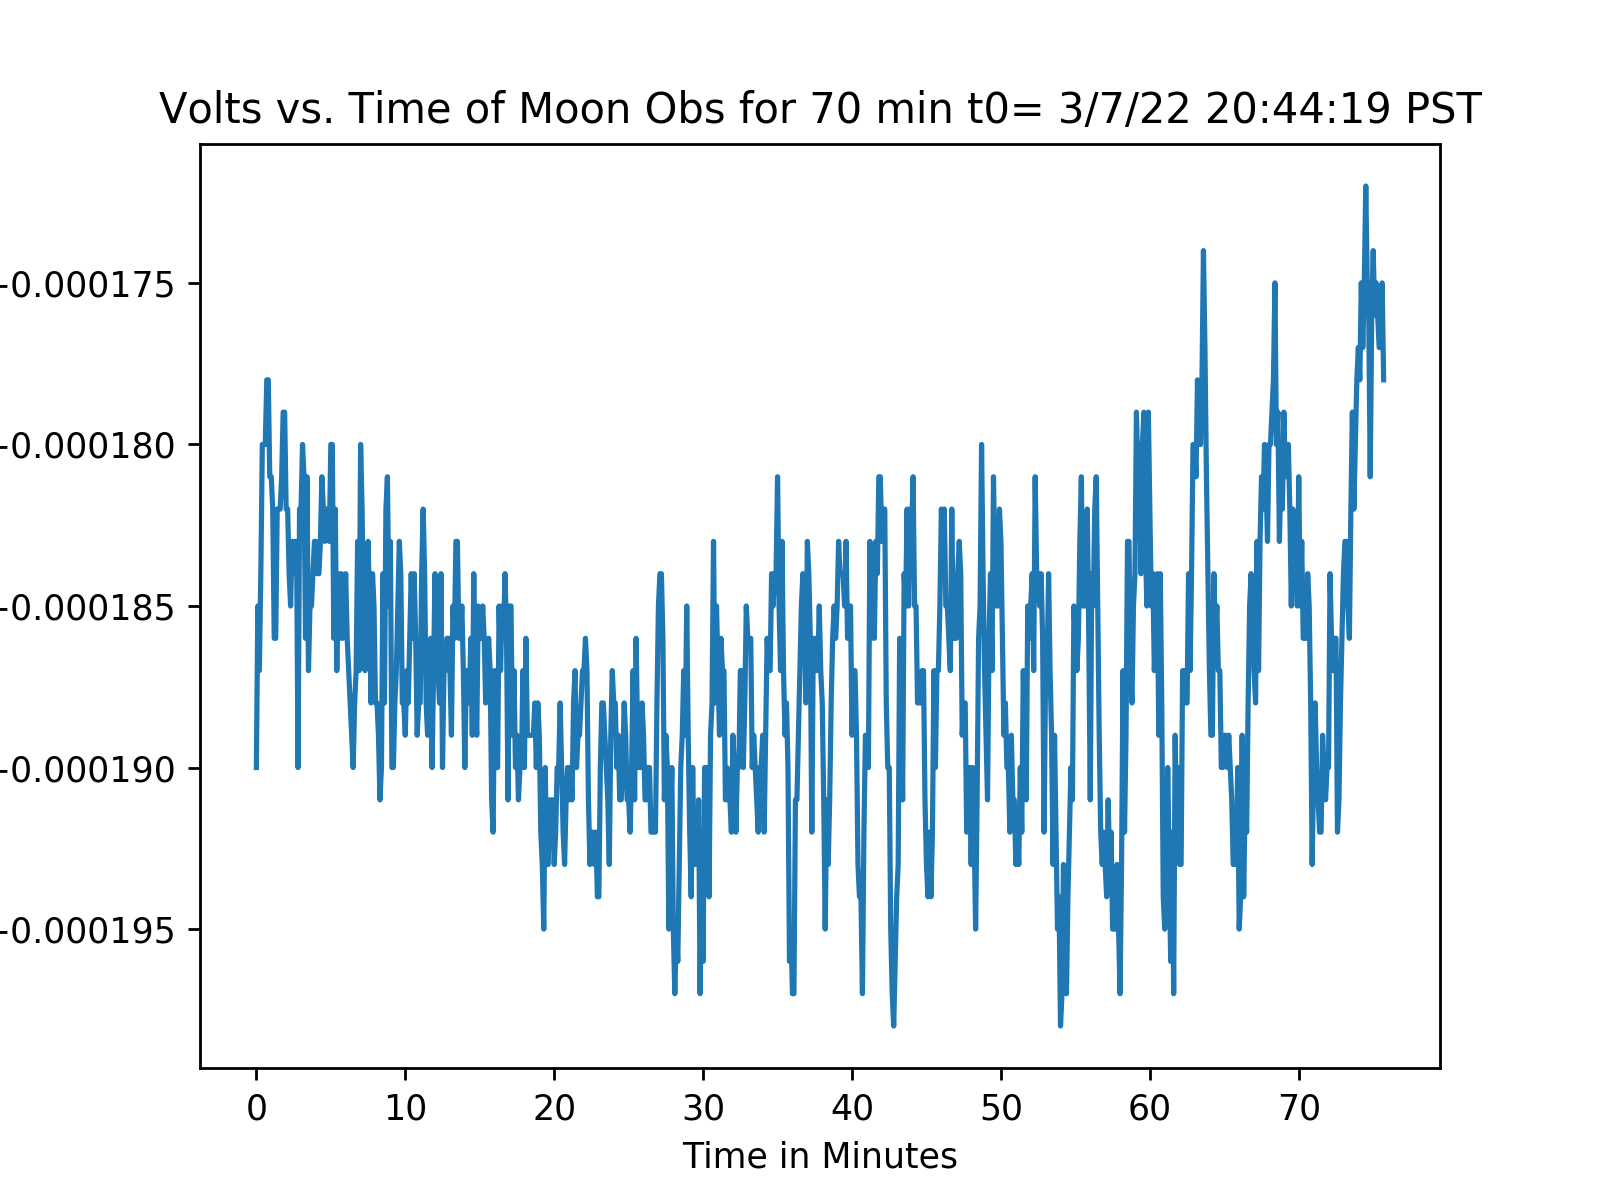

In [10]:
plt.figure()
plt.xlabel("Time in Minutes")
plt.ylabel("Voltage in Volts")
plt.title("Volts vs. Time of Moon Obs for 70 min t0= 3/7/22 20:44:19 PST")
plt.plot(moon_times/60, moon_volts)
# we can see the frequencies are getting smaller 
# this happens at the horizons 
# frequency changes as the cosine of the angle (highest at zentih and lowest at horizon)

<IPython.core.display.Javascript object>


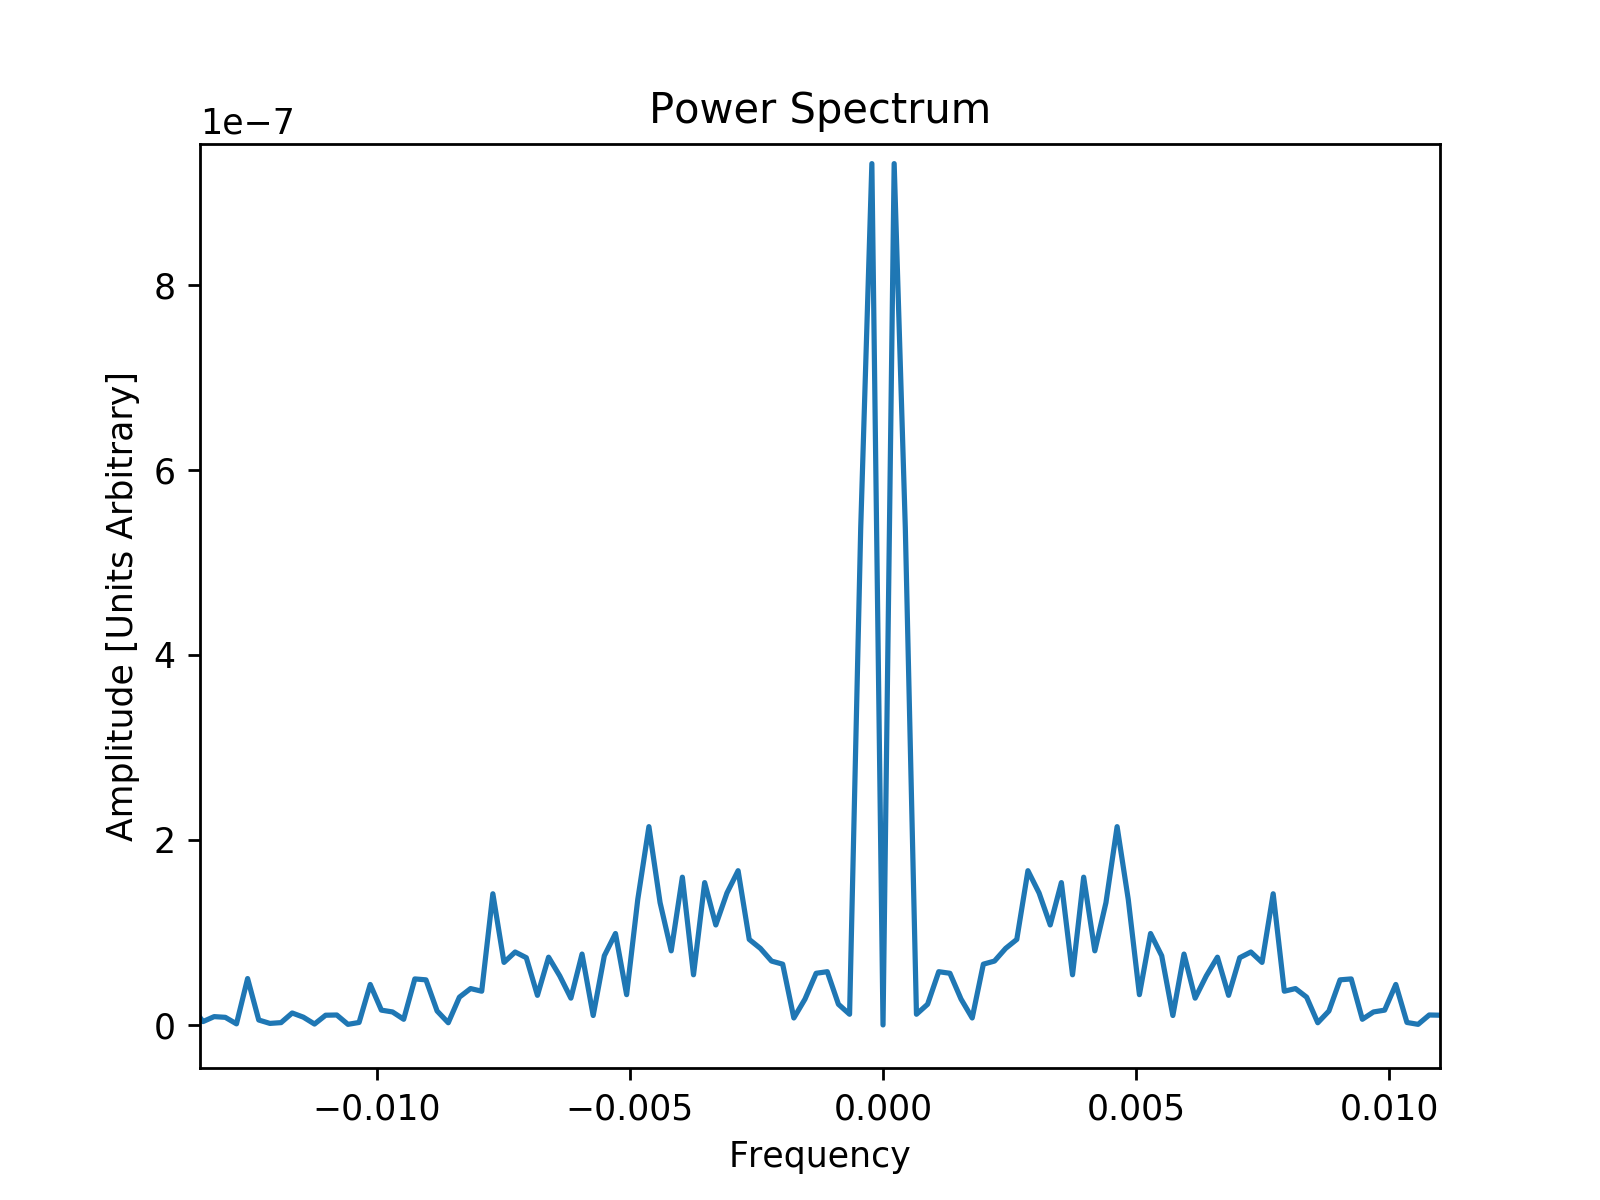

In [11]:
voltage_spectrum = np.fft.fft(moon_volts)
voltage_spectrum[0] = 0 # this is the same as subtracting the mean in the timeseries data 
power_spectrum = np.abs(voltage_spectrum)**2
frequencies = np.fft.fftfreq(len(power_spectrum), dt)

plt.figure()
plt.title("Power Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Amplitude [Units Arbitrary]")
plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(power_spectrum)) # shifting the arrays to read correctly

<IPython.core.display.Javascript object>


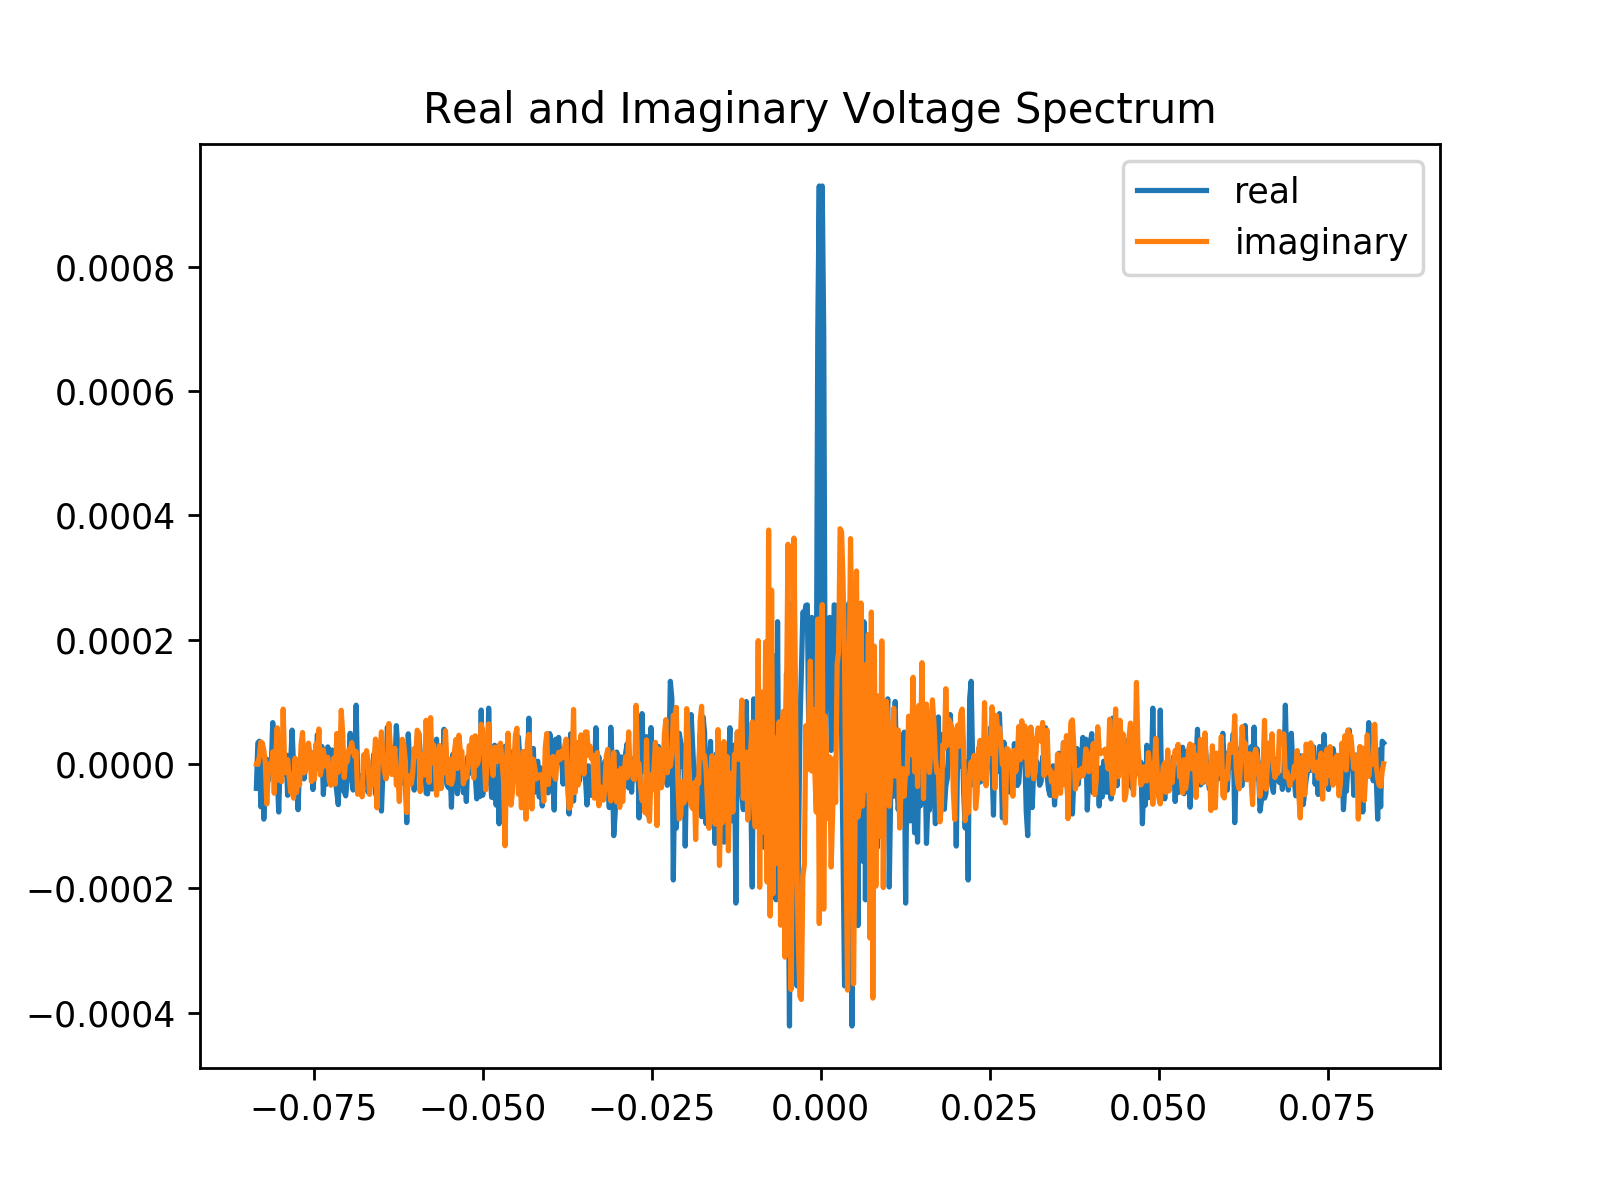

In [5]:
plt.figure()
plt.title("Real and Imaginary Voltage Spectrum")

plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(voltage_spectrum.real), label="real")
plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(voltage_spectrum.imag), label = "imaginary")# shifting the arrays to read correctly
plt.legend()

In [6]:
moon_spectra = new_interf.f_transform(moon_volts)
new_interf.f_transform??

<IPython.core.display.Javascript object>


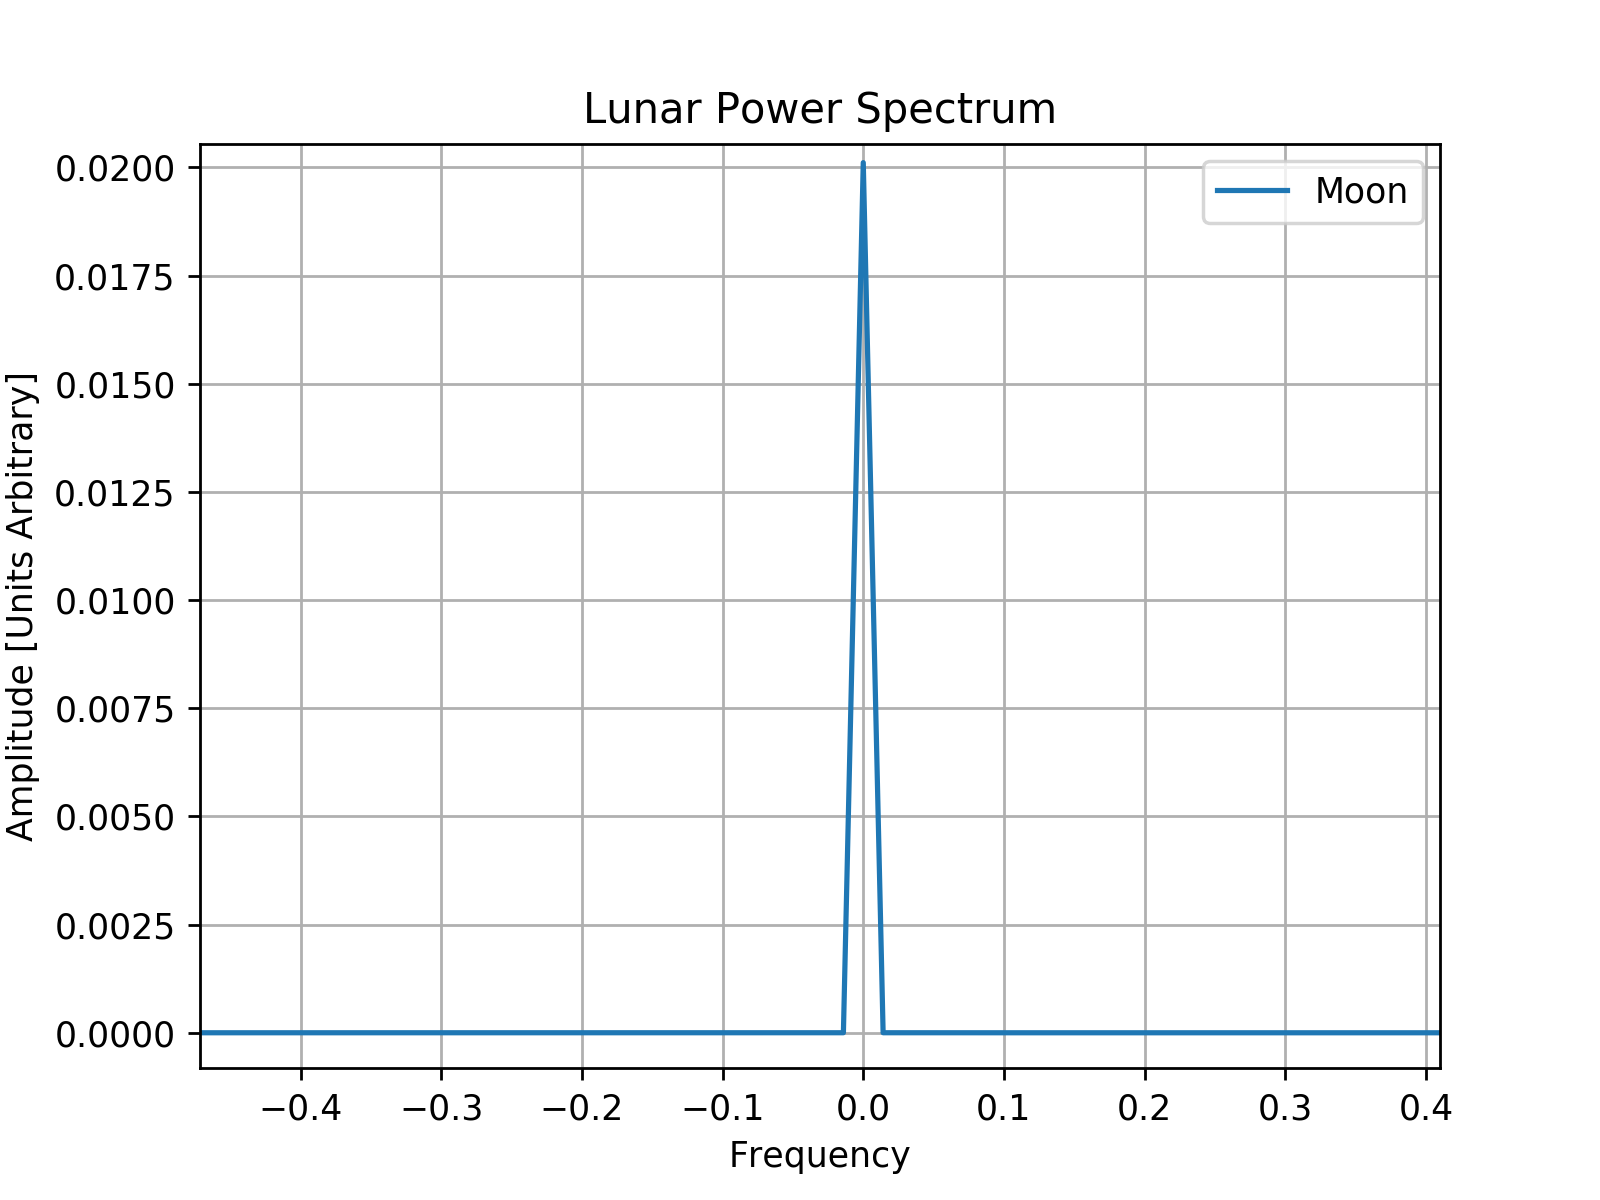

In [7]:
plt.figure()
plt.grid()
plt.title('Lunar Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(moon_spectra[0], moon_spectra[1], label = "Moon")
plt.legend()
plt.show()